In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    precision_recall_fscore_support,
)
import matplotlib.pyplot as plt
import urllib.request

url = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes'

# Downloading the dataset storing onto the local system
local_filename = 'diabetes'
urllib.request.urlretrieve(url, local_filename)
print("Download complete.")

# Loading the dataset using load_svmlight_file
X, y = load_svmlight_file(local_filename)
X = X.toarray()  # Converting sparse matrix to dense
print("Dataset loaded.")

# Checking the unique labels
print("Unique labels in the dataset:", np.unique(y))

# Defining the Perceptron Algorithm
class Perceptron:
    def __init__(self, learning_rate=1.0, n_iter=1000):
        self.learning_rate = learning_rate      # Learning rate 
        self.n_iter = n_iter                    # Number of iterations
        self.weights = None                     # Weight vector
        self.bias = None                        # Bias term
        self.label_map = None                   # Label mapping

    def fit(self, X, y):
        # Initializing weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Converting labels to -1 and 1
        unique_labels = np.unique(y)
        if len(unique_labels) != 2:
            raise ValueError("Perceptron requires exactly two unique labels.")
        self.label_map = {unique_labels[0]: -1, unique_labels[1]: 1}
        y_ = np.array([self.label_map[label] for label in y])

        # Training loop
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                # Calculate linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Predict the class label (-1 or 1)
                y_predicted = np.sign(linear_output)
                # Update weights and bias if misclassified
                if y_predicted != y_[idx]:
                    update = self.learning_rate * y_[idx]
                    self.weights += update * x_i
                    self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        # Map predicted labels back to original labels
        inv_label_map = {v: k for k, v in self.label_map.items()}
        y_predicted_mapped = np.array([inv_label_map[pred] for pred in y_predicted])
        return y_predicted_mapped

# Splitting the data into training, validation, and testing sets
# First split into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3)

# split train+val into train and val sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=3)  # 0.25 x 0.8 = 0.2


# Initializing and training the perceptron
perceptron = Perceptron(learning_rate=1.0, n_iter=1000)
perceptron.fit(X_train, y_train)
print("Model training complete.")

# Predicting and evaluatign on the training set
y_train_pred = perceptron.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Perceptron training accuracy: {train_accuracy * 100:.2f}%')

# Predicting and evaluatign on the validation set
y_val_pred = perceptron.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Perceptron validation accuracy: {val_accuracy * 100:.2f}%')

# Predicting and evaluatign on the test set
y_test_pred = perceptron.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Perceptron test accuracy: {test_accuracy * 100:.2f}%')

Download complete.
Dataset loaded.
Unique labels in the dataset: [-1.  1.]
Model training complete.
Perceptron training accuracy: 67.61%
Perceptron validation accuracy: 64.94%
Perceptron test accuracy: 59.74%


Confusion Matrix:
[[ 1 61]
 [ 1 91]]


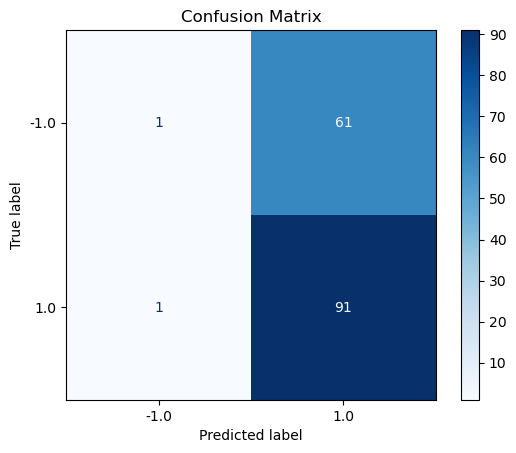

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.50      0.02      0.03        62
         1.0       0.60      0.99      0.75        92

    accuracy                           0.60       154
   macro avg       0.55      0.50      0.39       154
weighted avg       0.56      0.60      0.46       154



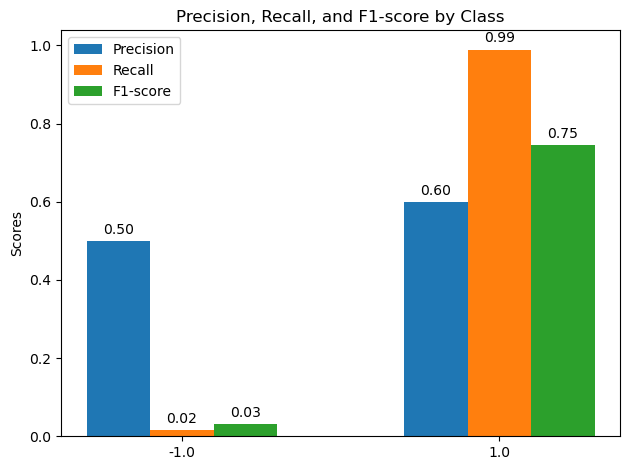

In [2]:
#  confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Visualizing confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=perceptron.label_map.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# classification report
report = classification_report(
    y_test, y_test_pred, target_names=[str(label) for label in perceptron.label_map.keys()]
)
print('Classification Report:')
print(report)

# precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred)

# Plotting precision, recall, and F1-score for each class
labels = [str(label) for label in perceptron.label_map.keys()]
x = np.arange(len(labels))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')


ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f'{height:.2f}',
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # Offset text by 3 points vertically
            textcoords="offset points",
            ha='center',
            va='bottom'
        )

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()